# Finite Volumina zur Lösung der linearen Diffusionsgleichung

In [1]:
# wie immer, lass uns einige wichtige Module importieren
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import ticker as mtick

---

## Aufgabe 7.1
Betrachten Sie ein ruhendes Fluid. Die eindimensionale Transportgleichung einer Größe $\phi(x,t)$ wegen molekularer Diffusion wird von der folgenden Gleichung beschrieben:

\begin{equation}
    \phi_{/t} = \alpha \phi_{/xx}    \,     \qquad\qquad (1)
    \label{eq:diff}
\end{equation}

wobei $\alpha = \text{konst.} > 0$ ein positiver und konstanter Diffusionskoeffizient ist. Wenn Gleichung 1 die Wärmeleitung im Fluid beispielsweise darstellte, wären $\phi$ die Temperatur des Fluids und $\alpha$ seine Temperaturleitfähigkeit. Es wird eine Dirichlet-Randbedingung am linken Rand ($x=0$) vorgegeben, während eine homogene Neumann-Randbedingung liegt am rechten Rand ($x=L_x)$ vor. Die Randbedingungen sind also:

\begin{equation}
    \begin{cases}
        \phi (x=0, t) &= \phi_0 \\
        \phi_x(x=L, t) &= 0
    \end{cases} \, , \qquad \qquad (2)
    \label{eq:bc}
\end{equation}

während die Anfangsbedingung wie folgt ist:

\begin{equation}
    \phi (t=0, x>0) = 0 \, . \qquad \qquad (3)
    \label{eq:ic}
\end{equation}

Wenn wir wieder das vorliegende Problem als ein Wärmeleitungsproblem interpretieren, wird hier das Fluid am Rechten Rand bei konstanter Temperatur $\phi_0$ gehalten, während keine Wärmeleitung am rechten Rand stattfindet. Das Fluid wird sich solange aufheizen bis ein stationärer Zustand erreicht wird.  

Diskretisieren und Lösen Sie Gleichung 1 mit Hilfe der finiten Volumen Methode. Dafür definieren Sie ein äquidistantes Gitter im Lösungsgebiet $x \in [0,L_x]$ bestehend aus $N_x$ Zellen $C_i$ für $i=1,\cdots,N_x$, wobei die dazugehörigen zellzentrierten Kontrollvolumina Grenzflächen $I_{i-1/2}$ an Stellen $x_{i-1/2}^{(I)}$ haben. Legen Sie die Kontrollvolumina so wie in Abbildung 1} auf. Das wird Ihnen helfen die Randbedingungen in der möglichst einfachsten Form vorzugeben. 

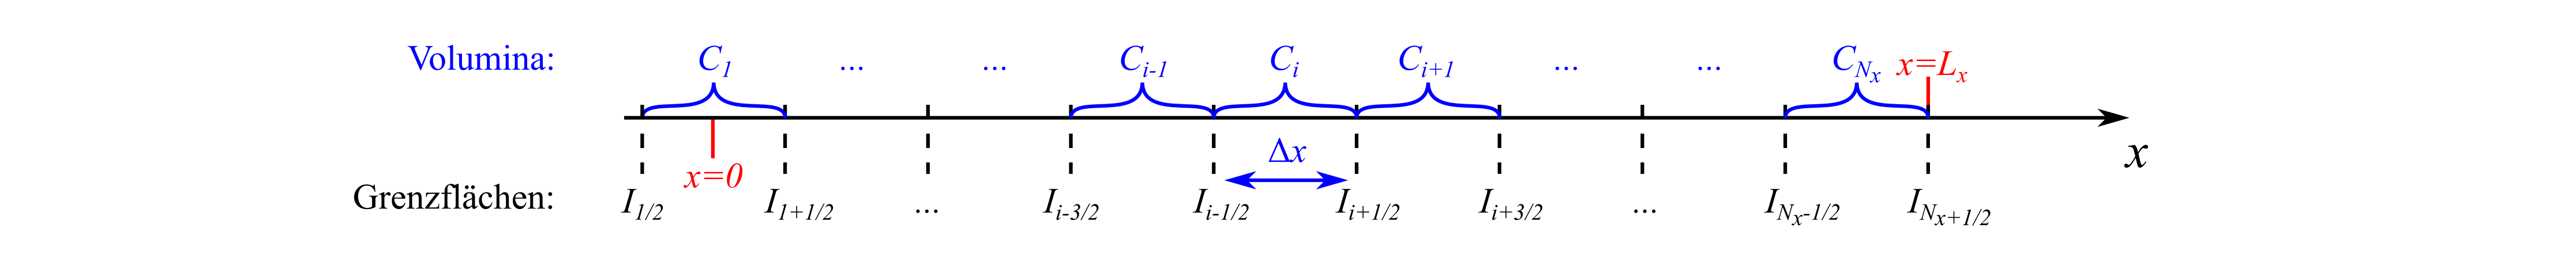

*  a) Die diffusive Flüsse $F_{i\pm1/2}$ an den Grenzflächen $I_{i\pm1/2}$ der Kontrollvolumina $C_i$ müssen noch definiert werden. Verwenden Sie hierfür zentrale finite Differenzen zur Diskretisierung des Gradienden, welcher in dem Ausdruck der Flüsse auftritt.     
    
*  b) Wie soll der Fluss $F_{N_x + 1/2}$ an der Grenzfläche $I_{N_x + 1/2}$ diskretisiert werden, um die Randbedingung 2 am rechten Rand vorzugeben? 

*  c) Wie könnte der linken Wert $\phi(x_1)$ der Lösung vorgegeben werden, so dass die Randbedingung 2 am linken Rand jederzeit erfüllt ist?

*  d) Wählen Sie $\alpha = 1$, $\phi_0 = 1$, $L_x = 1$ und $N_x = 16$. Integrieren Sie die Gleichung 1 für $N_t = \{ 10, 20, 100 \}$ Zeitschritte. Bestimmen Sie die Zeitschrittweite so, dass der dimensionslose Parameter $\beta = \alpha \Delta t / \Delta x^2$ folgende Werte aufweist: $\alpha = \{ 1.1, 0.8, 0.6, 0.4, 0.1 \}$. Benutzen Sie für die zeitliche Diskretisierung das explizite Euler-Verfahren.  
    
*  e) Führen Sie eine Konvergenzstudie durch. Dies bedeutet, dass zunächst ein feines Gitter gewählt wird (z.B. $N_x = 1024$) und der Zeitschritt so gewählt wird, dass eine stabile Berechnung erreicht wird. Die Berechnung wird mit einer festen Anzahl von Zeitschritten (z.B. $N_t = 100$) durchgeführt, und das Ergebnis $\phi(x_i, t = N_t \Delta t$) wird mit der exakten Lösung $\phi_{\mathrm{exakt}}(x, t)$ verglichen. Verwenden Sie eine der in Übung 4d) angegebenen Fehlernormen. Die analytische Lösung für das vorliegende Problem ist in Gleichung 4 angegeben. Dann wird die Berechnung mit einem gröberen Gitter wiederholt (wobei alle anderen Parameter gleich bleiben), der Fehler wird aufgezeichnet, und so weiter. Verwenden hierfür $\beta=0.5$. Welche Ordnung der Genauigkeit im Raum stellen Sie bei einem ausreichend feinen Gittern fest?
    
    Analytische Lösung der Gleichung 1 mit Randbedingungen 2 und Anfangsbedingung 3
    
    \begin{equation}
        \phi_{\mathrm{exakt}}(x,t) = \phi_0 + \sum_{k=1}^\infty B_k \exp \left( -\alpha t \left( \pi \frac{2k - 1}{2 L_x} \right)^2 \right) \sin \left( (2k-1)\pi \frac{x}{2 L_x}\right) \, , \qquad (4)
        \label{eq:exakt}
    \end{equation}
    
    wobei
    
    \begin{equation}
        B_k = 4 \phi_0 (\sin (k\pi) -1) / ((2k-1)\pi)\, .
    \end{equation}
    
    Eine ausreichend genaue Lösung wird erreicht, wenn man die unendliche Reihe von Gleichung 4 bei $k\approx 500$ abbricht. 
 

-----------

Zuerst, definieren Sie die Parameter des Gitters und der Gleichung. 

In [2]:
##########
# INPUTS #
##########

L = 1.0         # [m] Länge des Gebiets
alfa = 1.0      # [m^2/s] Advektionsgeschwindigkeit
phi0 = 1.0      # Wert der Dirichlet-Randbedingung am linken Rand
Nt = 100         # Anzahl der zu berechnende Zeitschritte
Nx = 1024         # Anzahl von Zellen / Kontrollvolumina (KV)
beta = 0.5      # dimensionsloser Parameter alfa/(dx^2/dt) = alfa * dt / dx^2 = beta

Definieren Sie die Vektoren $\mathbf{x}$ der Koordinaten von den Mittelpunkten der Kontrollvolumina (KV), $\mathbf{\phi}$ der unbekannten Lösungsvariable, $\mathbf{F}$ der Flüsse an den KV Grenzflächen. Nachdem Sie in dem oberen Block $N_x$ und $\sigma$ definiert haben, können Sie jetzt die Breite $\Delta x$ des Kontrollvolumens und die Zeitschrittweite $\Delta t$ auch definieren.

In [3]:
dx = L/(Nx-0.5)                 # [m] Auflösung
dt = beta * dx**2 / alfa        # [s] Zeitschritt

x = (np.arange(Nx))*dx          # Gitter (Vektor der Koordinate von den KV Mittelpunkten)
x_I = (np.arange(Nx+1)-0.5)*dx  # Gitter (Vektor der Koordinate der KV Grenzfflächen: nicht nötig für Berechnung!)
phi = np.zeros(Nx)              # Vektor der im KV gemittelten phi-Werte
F = np.zeros(Nx+1)              # Vektor der Flüsse an den KV Grenzflächen

Wir können die Anfangsbedingung direkt in den Vektor \bm{\phi} definieren

In [4]:
# Der einzige Wert, der nicht null ist, ist am linken Rand!
phi[0] = phi0

d) Iterieren Sie über $N_t$ Zeitschritte mit dem Index $0 \leq n \leq N_t$.
* Iterieren Sie über alle KV Grenzflächen und berechnen Sie alle Flüsse $F_{i+1/2}^n$ und speichern Sie in den Vektor $\mathbf{F}$.
* Iterieren Sie über alle Volumina und berechnen Sie die Bilanz der Flüsse für jedes Volumen. Aktualisieren Sie die Lösung $\mathbf{\phi}$.
    
Passen Sie auf die Randbedingungen auf! 

In [5]:
# Zuerst definieren wir die Zeit
# vor der Integration sind wir beim Zeitpunkt null
t=0
# Wir starten die zeitliche Integration
# als For-Schleife für Nt Zeitschritte
for n in range(Nt):
    # Wir aktualisieren die Zeit
    t = t + dt
    # Wir berechnen die diffusive Flüsse (grad(phi)*n) mit den zentralen finiten Differenzen
    for iF in range(1,Nx):
        F[iF] = -alfa*(phi[iF]-phi[iF-1])/dx
    # Wir setzen die Randbedingung am rechten Rand
    F[-1] = 0
    # Die Randbedingung am linken Rand ist schon in der Anfangsbedingung vorhanden!
    # Wir können enfach den Wert bei phi[0] nicht aktualisieren, damit die RB bleibt!
    
    # Wir aktualisieren die Lösung
    for i in range(1,Nx):
        phi[i] += (dt/dx)*(F[i]-F[i+1])


Bevor wir die Lösung darstellen, ist es sinnvoll, die analytische exakte Lösung des Problems zu implementieren. Das machen wir mit einer Funktion, weil der Ausdruck relativ komplex ist. 

In [6]:
# Wir definieren eine Hilfsfunktion für den Koeffizienten Bk
def Bk(k,phi0):
    Bk = 4.0*phi0*(np.sin(k*np.pi)-1)/((2*k-1)*np.pi)
    return Bk

# Wir definieren die Funktion, mit der wir die exakten Lösung definieren 
def phi_exakt(t,x,kmax,phi0,alfa,Lx):
    phi_exakt=np.zeros(x.shape)
    for i,xi in enumerate(x):  # Loop über alle gewünschten x-Stellen
        phi_exakt[i] = phi0 
        for k in range(1,kmax+1):  # Loop über die Reihe, welche die Lösung definiert
            phi_exakt[i] += Bk(k,phi0)*np.exp(-alfa*t*(np.pi*(2*k-1)/(2*Lx))**2)*np.sin((2*k-1)*np.pi*xi/(2*Lx))
    return phi_exakt

# Wir können jetzt die exakte Lösung berechnen
x_ex = np.linspace(0,L,1024)
phi_ex = phi_exakt(Nt*dt,x_ex,100,phi0,alfa,L)

e) Stellen Sie das Ergebnis dar und überprüfen Sie diese, in dem Sie es mit dem erwarteten Ergebnis vergleichen. Probieren Sie die unterschiedlichen vorgeschlagenen Parameter aus. Was beobachten Sie?

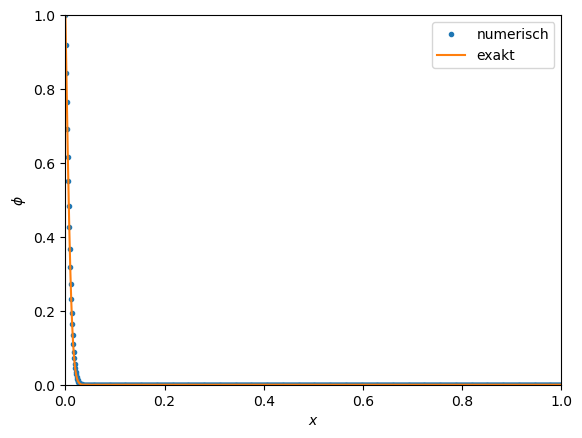

In [7]:
# Wir öffnen eine neue Abbildung
plt.figure()
# wir stellen die exakte und numerische Lösung dar
plt.plot(x,phi,'.',label='numerisch')
plt.plot(x_ex,phi_ex,label='exakt')
# wir setzen Grenzen für die x- und y-Achse:
# Wir sehen gleich wozu wir das brauchen
plt.ylim([0,1])
plt.xlim([0,1])
# wir zeigen die Legende an
plt.legend()
# und beschriften die Achsen
plt.xlabel(r'$x$')
plt.ylabel(r'$\phi$')
plt.show()

Führen Sie die Konvergenzstudie wie vorgeschlagen durch. Wählen Sie zunächst ein feines Gitter (z.B. $N_x = 1024$) und den daraus folgenden Zeitschritt, so dass eine stabile Berechnung erreicht wird.

In [9]:
# Feinstes Gitter, das wir betrachten werden und der dazugehörige Zeitschritt
Nx = 1024
beta = 0.2
dx = L/(Nx-0.5)                
dt = beta * dx**2 / alfa       
Nt = 400

# Anzahl von KV für die Gitterstudie
Nx_array = np.asarray([16, 32, 64, 128, 256, 512, 1024])
err_max = np.zeros(Nx_array.shape)
err_rms = np.zeros(Nx_array.shape)

# For-Schleife für alle ausgewählte Nx
for iGitter, Nx in enumerate(Nx_array):
    # Wir aktualisieren die Gitterweite
    dx = L/(Nx-0.5)  
    # und deklarieren die notwendigen Vektoren
    x = (np.arange(Nx))*dx          # Gitter (Vektor der Koordinate von den KV Mittelpunkten)
    phi = np.zeros(Nx)              # Vektor der im KV gemittelten phi-Werte
    F = np.zeros(Nx+1)              # Vektor der Flüsse an den KV Grenzflächen
    # wir setzen die Anfangsbedinung
    phi[0] = phi0
    # Zuerst definieren wir die Zeit
    # vor der Integration sind wir beim Zeitpunkt null
    t=0
    # Wir starten die zeitliche Integration
    # als For-Schleife für Nt Zeitschritte
    for n in range(Nt):
        # Wir aktualisieren die Zeit
        t = t + dt
        # Wir berechnen die diffusive Flüsse (grad(phi)*n) mit den zentralen finiten Differenzen
        for iF in range(1,Nx):
            F[iF] = -alfa*(phi[iF]-phi[iF-1])/dx
        # Wir setzen die Randbedingung am rechten Rand
        F[-1] = 0
        # Die Randbedingung am linken Rand ist schon in der Anfangsbedingung vorhanden!
        # Wir können enfach den Wert bei phi[0] nicht aktualisieren, damit die RB bleibt!
    
        # Wir aktualisieren die Lösung
        for i in range(1,Nx):
            phi[i] += (dt/dx)*(F[i]-F[i+1])
    # Jetzt ist die numerische Lösung berechnet: wir können die 
    # exakte Lösung berechnen zum Vergleichen. Wir erhöhen kmax zu einem 
    # sehr hohen Wert, um sicher zu gehen, dass die analytische Lösung 
    # sehr gut ist. 
    phi_ex = phi_exakt(t,x,500,phi0,alfa,L)
    # Wir speichern den maximalen Fehler
    err_max[iGitter] = np.max(np.abs(phi_ex-phi))
    err_rms[iGitter] = np.sqrt(np.sum((phi_ex-phi)**2)/Nx)

Jetzt können wir den Fehler darstellen

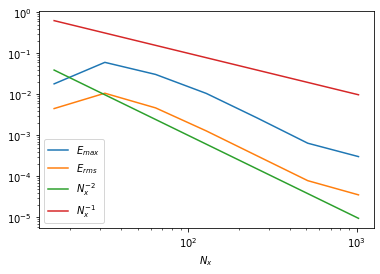

In [11]:
# Wir öffnen eine neue Abbildung
plt.figure()
# Wir plotten die Fehler mit dem plt.loglog Befehl
plt.loglog(Nx_array, err_max, label=r'$E_{max}$')
plt.loglog(Nx_array, err_rms, label=r'$E_{rms}$')
# Wir plotten auch die Potenzgesetzte Nx^-2 und Nx^-1 zum Vergleich
plt.loglog(Nx_array, 10*Nx_array**(-2.0), label=r'$N_x^{-2}$')
plt.loglog(Nx_array, 10*Nx_array**(-1.0), label=r'$N_x^{-1}$')
# Wir beschriften die Achsen
plt.xlabel(r'$N_x$')
# und zeigen die Legende
plt.legend()
plt.show()